# Sentence Segmentation

## Import libraries and declare constants

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import os


data_dir_path = 'data/'

## Quick Data Analysis (Qualitatively)

Have a quick look at sample data from each dataset

In [27]:
for domain in os.listdir(data_dir_path):
    domain_dir_path = os.path.join(data_dir_path, domain)

    # look at one document from each dataset
    sample_doc = os.listdir(domain_dir_path)[0]
    sample_doc_path = os.path.join(domain_dir_path, sample_doc)

    with open(sample_doc_path) as sample_file:
        text = sample_file.read()

    sentences = sent_tokenize(text)

    # look at first 20 sentences from sample document
    for sentence in sentences[:20]:
        print(sentence)

        words = word_tokenize(sentence)

        print(f'number of words: {len(words)}')
        print('--------')

General
	When two players pick the same hero in a round, the hero is banned instead and the round restarts
	All Pick hero selection duration reduced from 25 to 20 seconds
	Wards can now always be attacked by the owning player
	Harpy Stormcrafter mana capacity reduced from 150 to 125

Items
Ring of Regen
	Health regeneration reduced from 2 to 1.75

Soul Ring
	Health regen reduced from 2.5 to 2.25

Headdress
	Health regen reduced from 2.5 to 2

Mekansm
	Health regen aura reduced from 2.5 to 2

Pipe of Insight
	Health regen aura reduced from 2.5 to 2
	Recipe cost increased from 800 to 1000

Helm of the Dominator
	Health regen aura reduced from 5 to 4.25

Ring of Tarrasque
	Health regen reduced from 4.5 to 4

Royal Jelly
	Health regen reduced from 2.5 to 2.25

Necronomicon
	Strength reduced from 10/15/20 to 6/12/18

Vladmir&#39;s Offering
	Recipe cost increased from 450 to 550

Dust of Appearance
	Cost reduced from 90 to 80

Heroes
Beastmaster
	Call of the Wild Hawk
		Call of the Wild Hawk

It seems that the sentence tokenizer does not know how to segment sentences if punctuations are not present. This is not so much of a problem for the SIGBOVIK papers (which have full, proper English sentences), but it is quite a problem in the r/python posts and dota 2 patch notes (especially the patch notes, where changes to the game are written in point form)

Let's see what happens if a period/full-stop is added to each line for a sample dota 2 patch notes.

In [18]:
sample_dota2_txt_path = os.path.join(data_dir_path, 'dota2/7.27d.txt')

with open(sample_dota2_txt_path) as sample_file:
    # new-line characters separate 'sentences' currently
    text = sample_file.read().replace('\n\n', '. ').replace('\n', '. ')

sentences = sent_tokenize(text)

# look at first 20 sentences from sample document
for sentence in sentences[:20]:
    print(sentence)

    words = word_tokenize(sentence)

    print(f'number of words: {len(words)}')
    print('--------')

Items.
number of words: 2
--------
Drum of Endurance.
number of words: 4
--------
All stats reduced from +6 to +4.
number of words: 8
--------
Heaven&#39;s Halberd.
number of words: 4
--------
Now has a 400 gold recipe cost.
number of words: 8
--------
Soul Ring.
number of words: 3
--------
Recipe cost reduced from 350 to 275.
number of words: 8
--------
Helm of the Dominator.
number of words: 5
--------
Minimum health reduced from 1500 to 1000.
number of words: 8
--------
Now grants +4 Armor to the dominated creep.
number of words: 9
--------
Heroes.
number of words: 2
--------
Arc Warden.
number of words: 3
--------
Tempest Double.
number of words: 3
--------
Tempest Double no longer breaks Smoke of Deceit.
number of words: 9
--------
Talents.
number of words: 2
--------
Level 10 Talent reduced from +350 Flux Cast Range to +300.
number of words: 12
--------
Bane.
number of words: 2
--------
Brain Sap.
number of words: 3
--------
Brain Sap manacost increased from 110/130/150/170 to 12

Now this looks more correct.

Let's try fixing sentence segmentation for r/python posts by adding periods to 'sentences' that end with new-line characters but no ending punctuation ('.', '!', '?') directly before the new-line character.

In [25]:
sample_rpython_txt_path = os.path.join(data_dir_path, 'r-python/debugging-cheat-sheet.txt')

with open(sample_rpython_txt_path) as sample_file:
    # assume there is one sentence on each line
    text = sample_file.read()

lines = text.splitlines()
for index, line in enumerate(lines):
    # empty line, or
    # already has ending punctuation mark
    if line == '' or line[-1] in ('.', '!', '?'):
        continue

    lines[index] = line + '.'

text = ' '.join(lines)

sentences = sent_tokenize(text)

# look at first 20 sentences from sample document
for sentence in sentences[:20]:
    print(sentence)

    words = word_tokenize(sentence)

    print(f'number of words: {len(words)}')
    print('--------')

 Nice.
number of words: 2
--------
Btw u forgot the worst of them all .
number of words: 9
--------
== and =.
number of words: 4
--------
[Rubber Duck Debugging](https://rubberduckdebugging.com).
number of words: 11
--------
Edit: Fixed a word.
number of words: 6
--------
Great sheet!
number of words: 3
--------
If you don&#39;t mind me asking, what did you make it with?
number of words: 15
--------
I think it would be helpful to include a reminder that a SyntaxError might be caused by a mistake on a previous line: if line 29 has a SyntaxError and nothing looks wrong, you should check line 28 or 27.
number of words: 43
--------
Thanks!
number of words: 2
--------
This should help our students who seem alergic to reading error messages before asking for help :p. The most common source of `NameError` for me is when I create variable in `if` block, but not inside `else` block and then try to access it after the whole if/else.
number of words: 57
--------
The best way to avoid this especia

Not perfect (recognised 2 sentences as 1 in example above), but it is better than before

## Declare utility functions for preprocessing data

In [26]:
def preprocess_dota2_text(text: str) -> str:
    '''
    Preprocess dota 2 text, by replacing redundant new-lines with periods

    :params:
        text (str) - original text read from a dota 2 txt file

    :return:
        processed text (str)
    '''
    # handle empty lines first - otherwise we will get '..'
    return text.replace('\n\n', '. ').replace('\n', '. ')

def preprocess_rpython_text(text: str) -> str:
    '''
    Preprocess r/python text, by filling in missing periods

    :params:
        text (str) - original text read from a r/python txt file

    :return:
        processed text (str)
    '''
    lines = text.splitlines()
    for index, line in enumerate(lines):
        # empty line, or
        # already has ending punctuation mark
        if line == '' or line[-1] in ('.', '!', '?'):
            continue

        lines[index] = line + '.'

    return ' '.join(lines)

## Find distribution of sentence lengths in each domain

In [37]:
# sentence length distribution
# key: domain name (str)
# value: distribution (dict)
# distribution key: sentence length
# distribution value: number of sentences of such length
sent_len_dist = {}

preprocessing_functions = {
    'dota2': preprocess_dota2_text,
    'r-python': preprocess_rpython_text,
    'sigbovik': None,
}

def get_domain_dist(domain_dir_path: str, preprocess=None) -> dict:
    '''
    Get the distribution of sentence length in a domain

    :params:
        domain_dir_path (str): path to directory that contains domain-specific data
        preprocess (function): function for preprocessing data in the given domain (default: None)

    :return:
        a map of sentence length, to number of sentences of such length (dict)
    '''
    distribution = {}

    for txt in os.listdir(domain_dir_path):
        txt_file_path = os.path.join(domain_dir_path, txt)

        with open(txt_file_path) as txt_file:
            text = txt_file.read()
        
        text = preprocess_dota2_text(text)
        sentences = sent_tokenize(text)

        for sentence in sentences:
            words = word_tokenize(sentence)

            if len(words) in distribution:
                distribution[len(words)] += 1
            else:
                distribution[len(words)] = 1

    return distribution

for domain in os.listdir(data_dir_path):
    domain_dir_path = os.path.join(data_dir_path, domain)
    sent_len_dist[domain] = get_domain_dist(domain_dir_path, preprocessing_functions[domain])

for domain, distribution in sent_len_dist.items():
    print(domain, distribution)

dota2 {2: 852, 21: 13, 12: 188, 11: 211, 10: 245, 4: 153, 8: 352, 3: 595, 9: 280, 5: 31, 7: 179, 6: 103, 13: 123, 15: 72, 14: 102, 19: 14, 32: 4, 43: 1, 18: 18, 16: 29, 28: 10, 17: 23, 23: 3, 37: 1, 29: 1, 20: 8, 22: 7, 25: 2, 24: 4, 33: 1, 27: 1, 38: 1, 26: 1}
sigbovik {8: 268, 7: 260, 6: 267, 5: 287, 16: 139, 4: 300, 2: 416, 15: 191, 17: 121, 12: 258, 18: 87, 14: 221, 9: 288, 10: 266, 13: 237, 3: 344, 31: 6, 25: 25, 11: 249, 20: 74, 26: 22, 21: 55, 22: 48, 19: 79, 24: 38, 30: 9, 39: 5, 29: 16, 28: 23, 32: 12, 23: 34, 27: 14, 51: 1, 34: 8, 89: 1, 45: 2, 35: 7, 1: 27, 38: 5, 42: 2, 37: 1, 59: 1, 56: 2, 41: 1, 50: 1, 33: 6, 40: 1, 44: 2, 54: 1, 49: 1, 64: 1, 47: 2, 46: 1, 58: 1}
r-python {1: 133, 16: 78, 3: 235, 8: 191, 24: 40, 4: 290, 27: 25, 13: 95, 20: 39, 17: 69, 10: 135, 12: 111, 2: 265, 25: 30, 31: 9, 21: 34, 32: 21, 6: 197, 52: 3, 19: 57, 5: 262, 7: 162, 14: 111, 11: 131, 63: 1, 9: 165, 15: 73, 18: 67, 30: 15, 41: 8, 23: 44, 38: 3, 65: 1, 78: 1, 36: 12, 22: 40, 34: 8, 44: 5, 29: 

## Plot bar charts for comparison of distributions

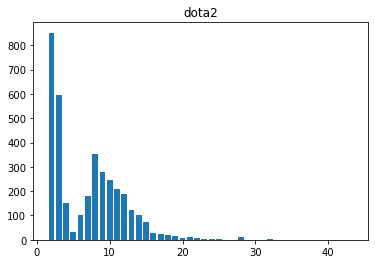

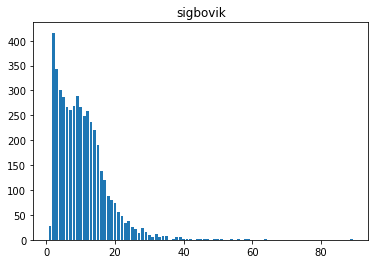

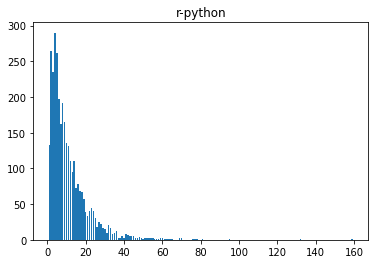

In [44]:
for domain, distribution in sent_len_dist.items():
    plt.bar(distribution.keys(), distribution.values())
    plt.title(domain)
    plt.show()

## Findings

TODO

## Miscellaneous

Additional charts / analysis

In [ ]:
# TODO